In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from functools import partial
import random
#import cv2
from PIL import Image
import matplotlib.image as mpimg
from scipy.spatial.distance import cdist

## K-Means Algorithm 


Numero de obervacoes:  800
Numero de atributos (features):  2


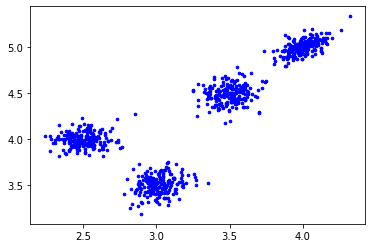

In [9]:
# loading data set
# data (NxM) = DataFrame a ser clusterizado N observacoes e M features
data = loadmat('fcm_dataset.mat')
data = pd.DataFrame(data['x'])
lendata = len(data)
print('Numero de obervacoes: ', lendata)
nfeatures = data.shape[1]
print('Numero de atributos (features): ', nfeatures)

data_np = data.values
for i in range(len(data_np)):
        plt.scatter(data_np[i][0], data_np[i][1], s=7, color = 'blue')

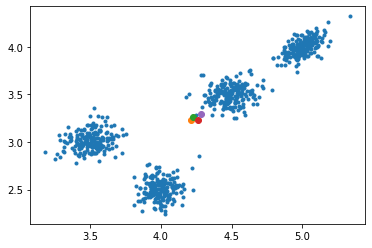

Número de iterações: 5


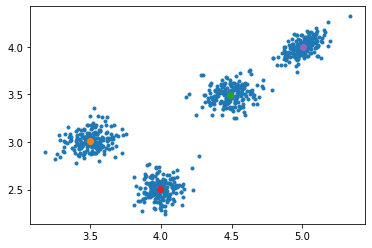

In [80]:
#Número de clusters
k = 4

#Vetor que indica em qual cluster está a amostra
idx = np.zeros((lendata,1))

#Matriz de partições
particao = np.zeros((lendata,k))

############################ Passo 1 ###############################
#Atribuir cada ponto a um determido cluster de forma aleatória
for i in range(lendata):
    rnd = np.random.randint(k)
    particao[i][rnd] = 1
    idx[i] = rnd

centr = calc_centroids(data, particao)

#Plotar dados e os centróides
plt.plot(data_np[:,1],data_np[:,0],'.')
for i in range(k):
    plt.plot(centr[i,1],centr[i,0],'o')
plt.show()

dist_total = 0
itr = 0

while(1):  
    
    ################### Passo 2 ##############################
    dist = np.zeros((lendata,1))
    for i in range(lendata):
        menor_dist = np.inf
        for j in range(k):
            data_atual = data_np[i,:]
            menor_dist_aux = np.linalg.norm(data_atual - centr[j,:])
            if menor_dist_aux <= menor_dist:
                menor_dist = menor_dist_aux
                idx[i] = j
                
    ################### Passo 3 ###############################
                dist[i] = menor_dist
    dist_total_aux = np.sum(dist)
    
    '''
    ################### Passo 3 ###############################
    #Calcula a distancia total entro os ponto e o cluster associado
    dist = np.zeros((lendata,1))
    for i in range(lendata):
        i_cl = int(idx[i])
        dist[i] = np.linalg.norm(data_np[i,:]-centr[i_cl,:])
    dist_total_aux = np.sum(dist)
    '''
    #Condição para sair do laço
    if dist_total_aux == dist_total:
        break
    else:
        dist_total = dist_total_aux
        itr += 1
        
    ###################### Passo 4 #############################
    particao = np.zeros((lendata,k))
    for i in range(lendata):
        rnd = idx[i]
        particao[i][int(rnd)] = 1

    centr = calc_centroids(data, particao)

print('Número de iterações:', itr)

#Plotar dados e os centróides
plt.plot(data_np[:,1],data_np[:,0],'.')
for i in range(k):
    plt.plot(centr[i,1],centr[i,0],'o')

plt.show()


In [67]:
# funcao que obtem os centroides
# centroids: np.array(K x N) - centroides (K vetores de M features) de cada grupo
def calc_centroids(data, partitions):
    
    #Número de características
    nfeatures = data.shape[1]
    
    #Número de partições
    K = partitions.shape[1]
    
    #K centroides com dimensões igual ao número de features
    centroids = np.zeros([K,nfeatures])
    
    #Valores do DataFrame de dados
    data_np = data.values
    
    #Cálcula a posição dos centóides
    for i in range(K):
        #Verifica quais amostras estão contidas no cluster i
        idx_nonzero =  np.flatnonzero(partitions[:,i])
        
        #Armazena o conteúdo presente no cluster i
        data_i = data_np[idx_nonzero,:]
        
        #Posiciona o centróide na posição média do cluster i 
        centroids[i] = np.mean(data_i, axis=0)
    return centroids